In [1]:
library(Matrix)
source("senet.R")

paras=list(
  px=100,
  py=20,
  n=500,
  lambda1=1,
  lambda2=100,
  noise.signal = 0.25,
  noise.response = 10
)
px=paras$px
betastar=sapply(1:px,twobump,px)
#betastar=sin(2*pi*(1:px)/px)

ctr=list(L = 1,
         use.gram = TRUE,
         maxiter = 10000, 
         tol = 1e-8,
         init = NULL,
         sigma = 0.9)

Lpx=crossprod(fd(paras$px))
Lpy=crossprod(fd(paras$py))
Lx=kronecker(Lpx,diag(rep(1,paras$py)))
Ly=kronecker(Lpy,diag(rep(1,paras$px)))
GL=crossprod( fd(paras$px*paras$py) ) 
P=matrix(0,paras$px*paras$py,paras$px*paras$py)
for(i in 1:paras$px){ for(j in 1:paras$py){ P[(i-1)*paras$py+j,(j-1)*paras$px+i]=1 } } # Permutation matrix
# Lambda = GL
# Lambda2 = GL+ t(P)%*%GL%*%P
Lambda=Ly
Lambda2=Ly+t(P)%*%Lx%*%P
Lambda3=GL
# L = Ll2(Xt, Lambda, lambda2 = paras$lambda2) ### fixed step-size
# L2 = Ll2(Xt, Lambda2, lambda2 = paras$lambda2) ### fixed step-size

In [15]:
l1s=c(1,10,100,1000)
l2s=c(1,10,100,1000)

df=NULL
for(i in 1:length(l1s)){
  for(j in 1:length(l2s)){
    df=rbind(df,c(i,j,l1s[i],l2s[j]))
  }
}
colnames(df)=c("id1","id2","lambda1","lambda2")

In [4]:
resm=matrix(0,nrow(df),3)
for(jobid in 1:nrow(df)){
 fname=paste0("./results/n",paras$n,"px",paras$px,"py",paras$py,"job",jobid,"T","1")
 load(paste0(fname,".RData"))
 resm[jobid,1]=norm(slist$input$B-slist$output$Bhat,"F")
 fname=paste0("./results/n",paras$n,"px",paras$px,"py",paras$py,"job",jobid,"T","2")
 load(paste0(fname,".RData"))
 resm[jobid,2]=norm(slist$input$B-slist$output$Bhat,"F")
 fname=paste0("./results/n",paras$n,"px",paras$px,"py",paras$py,"job",jobid,"T","3")
 load(paste0(fname,".RData"))
 resm[jobid,3]=norm(slist$input$B-slist$output$Bhat,"F")
}

In [16]:
df=cbind(df,resm)
df

id1,id2,lambda1,lambda2,,,
1,1,1,1,1.8670989,1.8670774,1.8670656
1,2,1,10,1.8670902,1.8668755,1.8667633
1,3,1,100,1.8669798,1.8648679,1.8637818
1,4,1,1000,1.8660360,1.8475254,1.8371321
2,1,10,1,1.8583231,1.8583016,1.8582893
2,2,10,10,1.8583156,1.8581012,1.8579876
2,3,10,100,1.8582054,1.8560996,1.8550261
2,4,10,1000,1.8572801,1.8388241,1.8284407
3,1,100,1,1.7700038,1.7699826,1.7699653
3,2,100,10,1.7699678,1.7697542,1.7696672


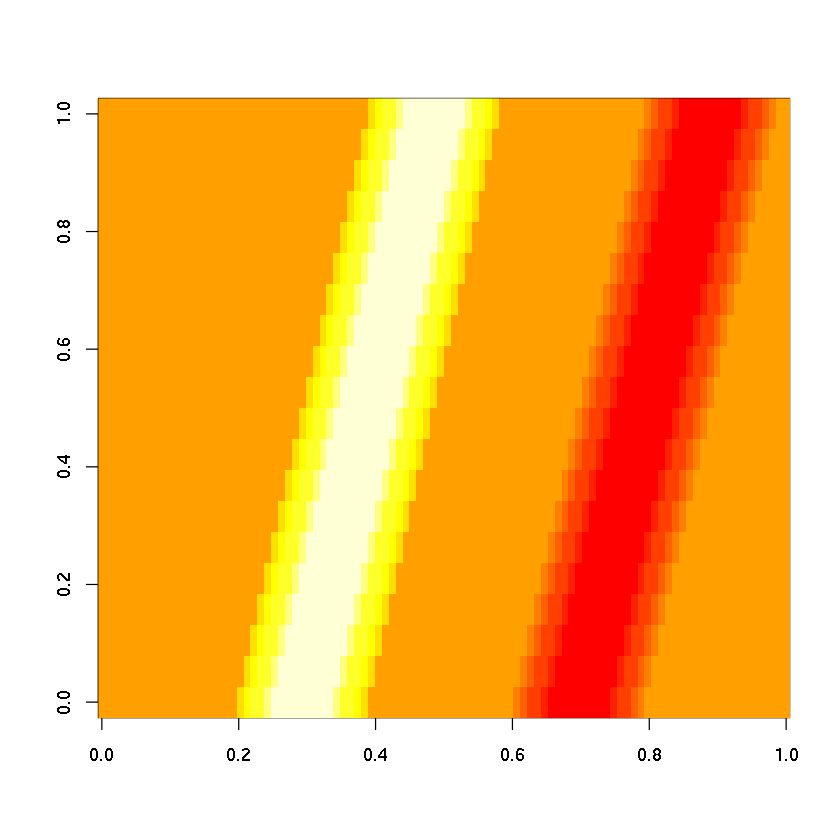

In [17]:
load("./results/n500px100py20job13T2.RData")
image(slist$input$B)

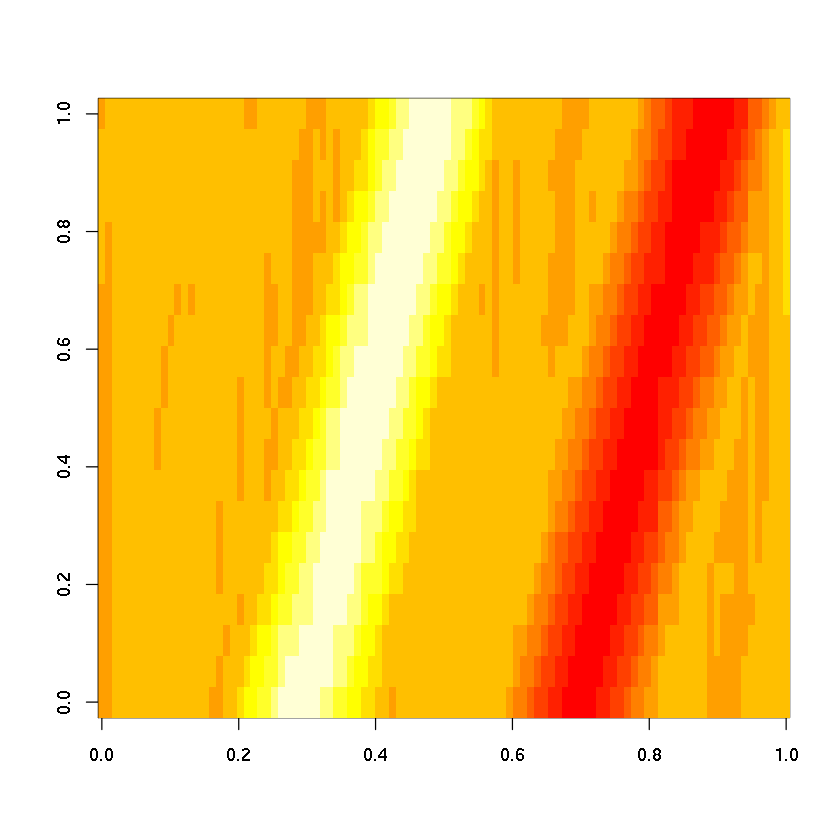

In [18]:
image(slist$output$Bhat)